In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023-Model.csv')
df.head()

CRASH DATE TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2018-01-01 00:00:00    QUEENS     11419  40.68297  -73.82824   
1  2018-01-01 00:00:00  BROOKLYN     11239  40.65306  -73.88202   
2  2018-01-01 00:00:00  BROOKLYN     11230  40.62418  -73.97048   
3  2018-01-01 00:00:00  BROOKLYN     11234  40.62877  -73.91825   
4  2018-01-01 00:00:00  BROOKLYN     11230  40.62322  -73.96102   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          0                         0   

    CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0             Passing Too Closely       3819067   
1  Driver Inattention/Distraction       3820851   
2  Driver Inattention/Distraction       3822296   
3   Failure to Yield Right-of-Way       3820945   
4  Driver Inattention/Distraction       3821055   

                   VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                Sedan         Moving Violation  Winter   
1                                Sedan       Driver Inattention  Winter   
2  Station Wagon/Sport Utility Vehicle       Driver Inattention  Winter   
3                                Sedan         Moving Violation  Winter   
4                                 Taxi       Driver Inattention  Winter   

  TIME OF DAY  IS RUSH HOUR  
0  Late Night         False  
1  Late Night         False  
2  Late Night         False  
3  Late Night         False  
4  Late Night         False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   BOROUGH                        213962 non-null  object 
 2   ZIP CODE                       213962 non-null  int64  
 3   LATITUDE                       213962 non-null  float64
 4   LONGITUDE                      213962 non-null  float64
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 8   COLLISION_ID                   213962 non-null  int64  
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

## Folium Maps

In [4]:
#Create dataframe with only relevant coliums to map making
df_collisions = df[['LATITUDE', 'LONGITUDE', 'COLLISION_ID']]
df_collisions

LATITUDE  LONGITUDE  COLLISION_ID
0       40.682970 -73.828240       3819067
1       40.653060 -73.882020       3820851
2       40.624180 -73.970480       3822296
3       40.628770 -73.918250       3820945
4       40.623220 -73.961020       3821055
...           ...        ...           ...
213957  40.766150 -73.919785       4594338
213958  40.697582 -73.929830       4594636
213959  40.760098 -73.859300       4594416
213960  40.699482 -73.961040       4594910
213961  40.763725 -73.914670       4596267

[213962 rows x 3 columns]

In [5]:
df_collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LATITUDE      213962 non-null  float64
 1   LONGITUDE     213962 non-null  float64
 2   COLLISION_ID  213962 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 4.9 MB


# HEAT MAP

In [6]:
#Create a blank map
map = folium.Map(location=[df_collisions.LATITUDE.mean(), df_collisions.LONGITUDE.mean()], zoom_start=11, control_scale=True)

#Create index markers for Queens collisions
#for index, location_info in df_collisions.iterrows():
#    folium.Marker([location_info["LATITUDE"], location_info["LONGITUDE"]], popup=location_info["COLLISION_ID"]).add_to(map)
    
map

In [7]:
from folium.plugins import HeatMap

# List comprehension to make out list of lists
heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in df_collisions.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map)

# Display the map
map

## CHOROPLETH

In [8]:
mv = df.copy()
mv = mv.loc[df['CONTRIBUTING CATEGORY V1'] == 'Moving Violation']
mv

CRASH DATE TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       2018-01-01 00:00:00    QUEENS     11419  40.682970 -73.828240   
3       2018-01-01 00:00:00  BROOKLYN     11234  40.628770 -73.918250   
5       2018-01-01 00:05:00  BROOKLYN     11211  40.718460 -73.952810   
6       2018-01-01 00:15:00  BROOKLYN     11236  40.645176 -73.906220   
7       2018-01-01 00:27:00    QUEENS     11419  40.689133 -73.820860   
...                     ...       ...       ...        ...        ...   
213953  2022-12-31 21:00:00  BROOKLYN     11203  40.651650 -73.932045   
213955  2022-12-31 21:20:00    QUEENS     11106  40.759884 -73.936800   
213957  2022-12-31 22:02:00    QUEENS     11102  40.766150 -73.919785   
213958  2022-12-31 22:10:00  BROOKLYN     11221  40.697582 -73.929830   
213961  2022-12-31 23:50:00    QUEENS     11103  40.763725 -73.914670   

        NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                               0                         0   
3                               1                         0   
5                               0                         0   
6                               0                         0   
7                               0                         0   
...                           ...                       ...   
213953                          2                         0   
213955                          1                         0   
213957                          2                         0   
213958                          0                         0   
213961                          0                         0   

         CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0                  Passing Too Closely       3819067   
3        Failure to Yield Right-of-Way       3820945   
5        Failure to Yield Right-of-Way       3818641   
6                         Unsafe Speed       3824618   
7        Failure to Yield Right-of-Way       3821878   
...                                ...           ...   
213953           Following Too Closely       4594617   
213955   Failure to Yield Right-of-Way       4596703   
213957           Following Too Closely       4594338   
213958  Passing or Lane Usage Improper       4594636   
213961                Backing Unsafely       4596267   

                        VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                     Sedan         Moving Violation  Winter   
3                                     Sedan         Moving Violation  Winter   
5                                     Sedan         Moving Violation  Winter   
6       Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
7                                     Sedan         Moving Violation  Winter   
...                                     ...                      ...     ...   
213953  Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
213955                                Sedan         Moving Violation  Winter   
213957                                Sedan         Moving Violation  Winter   
213958  Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
213961                                Sedan         Moving Violation  Winter   

       TIME OF DAY  IS RUSH HOUR  
0       Late Night         False  
3       Late Night         False  
5       Late Night         False  
6       Late Night         False  
7       Late Night         False  
...            ...           ...  
213953       Night         False  
213955       Night         False  
213957       Night         False  
213958       Night         False  
213961       Night         False  

[104522 rows x 14 columns]

In [9]:
#Create a blank map
choro = folium.Map(location=[mv.LATITUDE.mean(), mv.LONGITUDE.mean()], zoom_start=11, control_scale=True)

#Create index markers for Queens collisions
#for index, location_info in df_collisions.iterrows():
#    folium.Marker([location_info["LATITUDE"], location_info["LONGITUDE"]], popup=location_info["COLLISION_ID"]).add_to(map)
    
choro

In [10]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

ts = df.copy()

#Group the values by day and count the number of instances of each value
daily_count = ts.groupby([ts['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Create pivot table of daily cause categories
ts_pivt = daily_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

ts_pivt.head(10)

CONTRIBUTING CATEGORY V1  Bodily Impairment  Driver Inattention  \
CRASH DATE TIME                                                   
2018-01-01                              4.0                45.0   
2018-01-02                              1.0                73.0   
2018-01-03                              3.0                86.0   
2018-01-04                              4.0                25.0   
2018-01-05                              2.0                53.0   
2018-01-06                              3.0                44.0   
2018-01-07                              4.0                32.0   
2018-01-08                              2.0                77.0   
2018-01-09                              4.0                60.0   
2018-01-10                              3.0                66.0   

CONTRIBUTING CATEGORY V1  Environmental Factors  Internal Electronics Usage  \
CRASH DATE TIME                                                               
2018-01-01                                  2.0                         0.0   
2018-01-02                                  8.0                         0.0   
2018-01-03                                  2.0                         1.0   
2018-01-04                                  2.0                         0.0   
2018-01-05                                  4.0                         0.0   
2018-01-06                                  2.0                         0.0   
2018-01-07                                  3.0                         0.0   
2018-01-08                                  4.0                         0.0   
2018-01-09                                  4.0                         0.0   
2018-01-10                                  4.0                         2.0   

CONTRIBUTING CATEGORY V1  Moving Violation  Other Distractions  \
CRASH DATE TIME                                                  
2018-01-01                            72.0                 2.0   
2018-01-02                            83.0                 3.0   
2018-01-03                           105.0                 1.0   
2018-01-04                            43.0                 0.0   
2018-01-05                           114.0                 0.0   
2018-01-06                            75.0                 1.0   
2018-01-07                            66.0                 1.0   
2018-01-08                           115.0                 0.0   
2018-01-09                           105.0                 1.0   
2018-01-10                           135.0                 0.0   

CONTRIBUTING CATEGORY V1  Road Conditions  Third-Party (Non-Vehicular)  \
CRASH DATE TIME                                                          
2018-01-01                            5.0                          0.0   
2018-01-02                            3.0                          2.0   
2018-01-03                            0.0                          3.0   
2018-01-04                           46.0                          0.0   
2018-01-05                           45.0                          0.0   
2018-01-06                           22.0                          1.0   
2018-01-07                           10.0                          1.0   
2018-01-08                            7.0                          0.0   
2018-01-09                            6.0                          2.0   
2018-01-10                            7.0                          0.0   

CONTRIBUTING CATEGORY V1  Third-Party (Vehicular)  Vehicle Defects  
CRASH DATE TIME                                                     
2018-01-01                                    5.0              1.0  
2018-01-02                                    9.0              6.0  
2018-01-03                                    8.0              1.0  
2018-01-04                                    4.0              3.0  
2018-01-05                                    7.0              2.0  
2018-01-06                                    4.0              3.0  
2018-01-07  

In [11]:
#Create dataframe counting number of accidents per zipcode
cause_count_by_zipcode = mv.groupby(['ZIP CODE', 'CONTRIBUTING CATEGORY V1']).count()['COLLISION_ID']

#reset index
cause_count_by_zipcode = cause_count_by_zipcode.reset_index(name='COUNT')

cause_count_by_zipcode

ZIP CODE CONTRIBUTING CATEGORY V1  COUNT
0       11001         Moving Violation     56
1       11004         Moving Violation    254
2       11005         Moving Violation      9
3       11040         Moving Violation     46
4       11101         Moving Violation   1484
..        ...                      ...    ...
98      11692         Moving Violation    215
99      11693         Moving Violation    185
100     11694         Moving Violation    213
101     11695         Moving Violation      1
102     11697         Moving Violation     12

[103 rows x 3 columns]

In [12]:
#Create a blank map
choro = folium.Map(location=[mv.LATITUDE.mean(), mv.LONGITUDE.mean()], zoom_start=11, control_scale=True)


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'        #for state level data


folium.Choropleth(
    geo_data = state_geo,                  #json
    name ='choropleth',                  
    data = cause_count_by_zipcode,                     
    columns = ['ZIP CODE', 'COUNT'], #columns to work on
    key_on ='feature.id',
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.2
).add_to(choro)
choro

In [35]:
#Create dataframe counting number of accidents per zipcode
count_test = df.groupby('ZIP CODE').count()['COLLISION_ID'].sort_values(ascending=False)

#reset index
count_test = count_test.reset_index(name='TOTAL # ACCIDENTS')

count_test.head(10)

ZIP CODE  TOTAL # ACCIDENTS
0     11207               6756
1     11234               5003
2     11101               4990
3     11385               4715
4     11236               4622
5     11211               4601
6     11206               4562
7     11368               4424
8     11208               4279
9     11201               4217

In [14]:
print(count_test['TOTAL # ACCIDENTS'].sum())
print()
print(count_test['TOTAL # ACCIDENTS'].describe())

213962

count     104.000000
mean     2057.326923
std      1394.095917
min         1.000000
25%       973.000000
50%      1900.500000
75%      2912.500000
max      6756.000000
Name: TOTAL # ACCIDENTS, dtype: float64


In [15]:
#Create dataframe counting number of accidents per zipcode
cause_count_by_zipcode = df.groupby('ZIP CODE').count()['COLLISION_ID']

#reset index
cause_count_by_zipcode = cause_count_by_zipcode.reset_index(name='COUNT')

cause_count_by_zipcode

ZIP CODE  COUNT
0       11001    109
1       11004    571
2       11005     17
3       11040     92
4       11101   4990
..        ...    ...
99      11692    516
100     11693    536
101     11694    649
102     11695      3
103     11697     47

[104 rows x 2 columns]

In [16]:
import geopandas as gpd

zipcodes = gpd.read_file('data/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zipcodes

ZIPCODE BLDGZIP        PO_NAME  POPULATION          AREA STATE    COUNTY  \
0     11436       0        Jamaica     18681.0  2.269930e+07    NY    Queens   
1     11213       0       Brooklyn     62426.0  2.963100e+07    NY     Kings   
2     11212       0       Brooklyn     83866.0  4.197210e+07    NY     Kings   
3     11225       0       Brooklyn     56527.0  2.369863e+07    NY     Kings   
4     11218       0       Brooklyn     72280.0  3.686880e+07    NY     Kings   
..      ...     ...            ...         ...           ...   ...       ...   
258   10310       0  Staten Island     25003.0  5.346328e+07    NY  Richmond   
259   11693       0   Far Rockaway     11052.0  3.497516e+06    NY     Kings   
260   11249       0       Brooklyn     28481.0  1.777221e+07    NY     Kings   
261   10162       1       New York         0.0  2.103489e+04    NY  New York   
262   10119       1       New York         0.0  1.263930e+05    NY  New York   

    ST_FIPS CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0        36      081  http://www.usps.com/         0.0        0.0   
1        36      047  http://www.usps.com/         0.0        0.0   
2        36      047  http://www.usps.com/         0.0        0.0   
3        36      047  http://www.usps.com/         0.0        0.0   
4        36      047  http://www.usps.com/         0.0        0.0   
..      ...      ...                   ...         ...        ...   
258      36      085  http://www.usps.com/         0.0        0.0   
259      36      047  http://www.usps.com/         0.0        0.0   
260      36      047  http://www.usps.com/         0.0        0.0   
261      36      061  http://www.usps.com/         0.0        0.0   
262      36      061  http://www.usps.com/         0.0        0.0   

                                              geometry  
0    POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1    POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2    POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3    POLYGON ((995908.365 183617.613, 996522.848 18...  
4    POLYGON ((991997.113 176307.496, 992042.798 17...  
..                                                 ...  
258  POLYGON ((950767.507 172848.969, 950787.510 17...  
259  POLYGON ((1028453.995 167153.410, 1027813.010 ...  
260  POLYGON ((995877.318 203206.075, 995968.511 20...  
261  POLYGON ((997731.761 219560.922, 997641.948 21...  
262  POLYGON ((986038.661 213051.063, 986135.314 21...  

[263 rows x 13 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE TIME                213962 non-null  datetime64[ns]
 1   BOROUGH                        213962 non-null  object        
 2   ZIP CODE                       213962 non-null  int64         
 3   LATITUDE                       213962 non-null  float64       
 4   LONGITUDE                      213962 non-null  float64       
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64         
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object        
 8   COLLISION_ID                   213962 non-null  int64         
 9   VEHICLE TYPE CODE 1            213962 non-null  object        
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object        
 11  

In [18]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 26.8+ KB


In [19]:
zipcodes['ZIPCODE'] = zipcodes['ZIPCODE'].astype('int64')

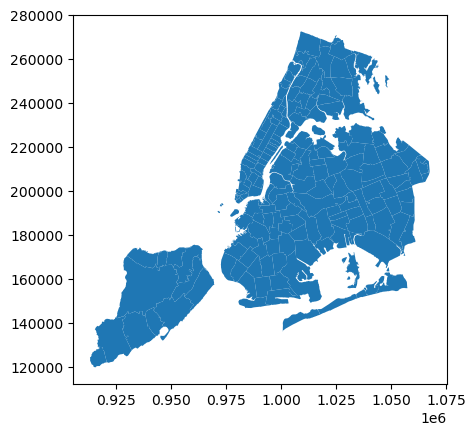

In [20]:
zipcodes.plot();

## CHOROPLETH

In [21]:
# Merge with your dataframe on the 'Zip code' column
merged2 = zipcodes.merge(cause_count_by_zipcode, left_on='ZIPCODE', right_on='ZIP CODE')
merged2


ZIPCODE BLDGZIP       PO_NAME  POPULATION          AREA STATE  COUNTY  \
0      11436       0       Jamaica     18681.0  2.269930e+07    NY  Queens   
1      11213       0      Brooklyn     62426.0  2.963100e+07    NY   Kings   
2      11212       0      Brooklyn     83866.0  4.197210e+07    NY   Kings   
3      11225       0      Brooklyn     56527.0  2.369863e+07    NY   Kings   
4      11218       0      Brooklyn     72280.0  3.686880e+07    NY   Kings   
..       ...     ...           ...         ...           ...   ...     ...   
103    11211       0      Brooklyn     60861.0  4.047088e+07    NY   Kings   
104    11373       0      Elmhurst    101282.0  4.265486e+07    NY  Queens   
105    11361       0       Bayside     28496.0  5.016352e+07    NY  Queens   
106    11414       0  Howard Beach     26148.0  6.392882e+07    NY  Queens   
107    11249       0      Brooklyn     28481.0  1.777221e+07    NY   Kings   

    ST_FIPS CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0        36      081  http://www.usps.com/         0.0        0.0   
1        36      047  http://www.usps.com/         0.0        0.0   
2        36      047  http://www.usps.com/         0.0        0.0   
3        36      047  http://www.usps.com/         0.0        0.0   
4        36      047  http://www.usps.com/         0.0        0.0   
..      ...      ...                   ...         ...        ...   
103      36      047  http://www.usps.com/         0.0        0.0   
104      36      081  http://www.usps.com/         0.0        0.0   
105      36      081  http://www.usps.com/         0.0        0.0   
106      36      081  http://www.usps.com/         0.0        0.0   
107      36      047  http://www.usps.com/         0.0        0.0   

                                              geometry  ZIP CODE  COUNT  
0    POLYGON ((1038098.252 188138.380, 1038141.936 ...     11436    883  
1    POLYGON ((1001613.713 186926.440, 1002314.243 ...     11213   2872  
2    POLYGON ((1011174.276 183696.338, 1011373.584 ...     11212   3737  
3    POLYGON ((995908.365 183617.613, 996522.848 18...     11225   2279  
4    POLYGON ((991997.113 176307.496, 992042.798 17...     11218   1529  
..                                                 ...       ...    ...  
103  POLYGON ((1004708.889 202095.457, 1004867.276 ...     11211   4601  
104  POLYGON ((1015508.539 204353.966, 1015508.502 ...     11373   3960  
105  POLYGON ((1048944.167 222063.575, 1048950.337 ...     11361   1516  
106  POLYGON ((1025670.681 184011.380, 1025872.813 ...     11414   1496  
107  POLYGON ((995877.318 203206.075, 995968.511 20...     11249   2018  

[108 rows x 15 columns]

In [23]:
merged2['ZIPCODE'].unique()

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 11357, 11356, 11359, 11360, 11105, 11363, 11354, 11102,
       11370, 11358, 11362, 11369, 11103, 11106, 11368, 11377, 11355,
       11101, 11364, 11005, 11104, 11109, 11367, 11222, 11378, 11237,
       11385, 11206, 11412, 11251, 11411, 11201, 11205, 11208, 11207,
       11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215, 11232,
       11430, 11203, 11239, 11236, 11220, 11234, 11693, 11209, 11228,
       11229, 11214, 11691, 11223, 11692, 11235, 11694, 11224, 11697,
       11372, 11004, 11040, 11426, 11365, 11001, 11375, 11427, 11374,
       11366, 11423, 11428, 11432, 11379, 11429, 11435, 11415, 11418,
       11433, 11221, 11421, 11419, 11434, 11216, 11416, 11233, 11211,
       11373, 11361, 11414, 11249])

In [24]:
#Filter for collisions that occured within the top 10 zip codes
top10zips_mv = [11207, 11234, 11101, 11385, 11236, 11211, 11206, 11368, 11201, 11208 ]

top10_choro = merged2.loc[merged2['ZIPCODE'].isin(top10zips_mv)]
top10_choro
#Filter for top two causes
#df = df.loc[df['CONTRIBUTING CATEGORY V1'].isin(['Moving Violation', 'Driver Inattention'])]
#df

ZIPCODE BLDGZIP           PO_NAME  POPULATION          AREA STATE  \
25     11368       0            Corona    109069.0  7.248966e+07    NY   
28     11101       0  Long Island City     26254.0  7.896209e+07    NY   
37     11385       0         Ridgewood     98436.0  1.247863e+08    NY   
38     11206       0          Brooklyn     83575.0  4.070072e+07    NY   
42     11201       0          Brooklyn     53041.0  4.109489e+07    NY   
44     11208       0          Brooklyn     94410.0  7.930368e+07    NY   
45     11207       0          Brooklyn     93556.0  7.396626e+07    NY   
59     11236       0          Brooklyn     94480.0  9.637399e+07    NY   
61     11234       0          Brooklyn     85853.0  2.062010e+08    NY   
103    11211       0          Brooklyn     60861.0  4.047088e+07    NY   

     COUNTY ST_FIPS CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
25   Queens      36      081  http://www.usps.com/         0.0        0.0   
28   Queens      36      081  http://www.usps.com/         0.0        0.0   
37   Queens      36      081  http://www.usps.com/         0.0        0.0   
38    Kings      36      047  http://www.usps.com/         0.0        0.0   
42    Kings      36      047  http://www.usps.com/         0.0        0.0   
44    Kings      36      047  http://www.usps.com/         0.0        0.0   
45    Kings      36      047  http://www.usps.com/         0.0        0.0   
59    Kings      36      047  http://www.usps.com/         0.0        0.0   
61    Kings      36      047  http://www.usps.com/         0.0        0.0   
103   Kings      36      047  http://www.usps.com/         0.0        0.0   

                                              geometry  ZIP CODE  COUNT  
25   POLYGON ((1022299.623 218703.908, 1022285.600 ...     11368   4424  
28   POLYGON ((996450.660 210544.144, 996513.807 21...     11101   4990  
37   POLYGON ((1007499.885 199242.452, 1007573.769 ...     11385   4715  
38   POLYGON ((1002987.943 197218.048, 1003016.011 ...     11206   4562  
42   POLYGON ((990158.980 196291.403, 990132.710 19...     11201   4217  
44   POLYGON ((1021326.923 188270.016, 1021333.109 ...     11208   4279  
45   POLYGON ((1010961.260 190844.518, 1010984.556 ...     11207   6756  
59   POLYGON ((1012306.415 178457.610, 1012350.198 ...     11236   4622  
61   POLYGON ((1002458.956 170567.601, 1002500.000 ...     11234   5003  
103  POLYGON ((1004708.889 202095.457, 1004867.276 ...     11211   4601

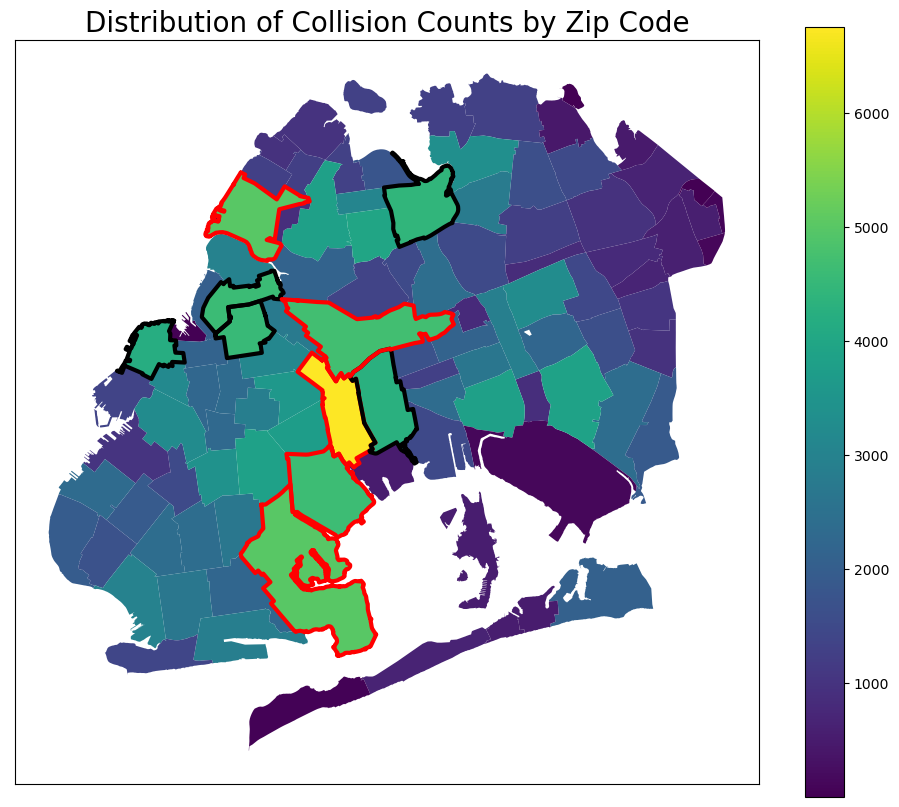

In [30]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
merged2.plot(column='COUNT', k=5, legend=True, ax=ax)
ax.set_title('Distribution of Collision Counts by Zip Code', fontsize = 20);

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Outline Brooklyn and Queens with a red line
bk_poly11234 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][61]
bk_poly11207 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][45]
bk_poly11236 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][59]
bk_poly11211 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][103]#
bk_poly11206 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][38]#
bk_poly11208 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][44]#
bk_poly11201 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][42]#


qn_poly11101 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][28]
qn_poly11385 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][37]
qn_poly11368 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][25]#


ax.plot(bk_poly11207.exterior.xy[0], bk_poly11207.exterior.xy[1], color='red', linewidth=3)
ax.plot(bk_poly11234.exterior.xy[0], bk_poly11234.exterior.xy[1], color='red', linewidth=3)
ax.plot(bk_poly11236.exterior.xy[0], bk_poly11236.exterior.xy[1], color='red', linewidth=3)

ax.plot(bk_poly11211.exterior.xy[0], bk_poly11211.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11206.exterior.xy[0], bk_poly11206.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11208.exterior.xy[0], bk_poly11208.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11201.exterior.xy[0], bk_poly11201.exterior.xy[1], color='black', linewidth=3)

ax.plot(qn_poly11101.exterior.xy[0], qn_poly11101.exterior.xy[1], color='red', linewidth=3)
ax.plot(qn_poly11385.exterior.xy[0], qn_poly11385.exterior.xy[1], color='red', linewidth=3)
ax.plot(qn_poly11368.exterior.xy[0], qn_poly11368.exterior.xy[1], color='black', linewidth=3);

In [ ]:
qn_poly = merged2[merged2['COUNTY'] == 'Queens']['geometry']
qn_poly.head(60)

In [ ]:
bk_poly = merged2[merged2['COUNTY'] == 'Kings']['geometry']
bk_poly